# Linear Regression Model Bitcoin Price

The purpose of this Jupyter Notebook is to demonstrate the application of data science and machine learning techniques in the context of cryptocurrency market analysis, specifically focusing on price prediction. The notebook aims to provide a comprehensive workflow that includes data collection, preprocessing, exploratory data analysis, and predictive modeling, using Python and its powerful libraries.

## Key Objectives of the Notebook:

### 1. Data Collection:
- To fetch historical cryptocurrency price data (like Bitcoin) using an API such as CoinMarketCap or CoinGecko.
- To understand how to handle and process data from external APIs in a Python environment.

### 2. Data Preprocessing:
- To clean and prepare the data for analysis. This involves handling missing values, parsing dates, and possibly creating additional features that could aid in the analysis.


### 3. Exploratory Data Analysis (EDA):
- To perform statistical analysis and visualization of the cryptocurrency data.
- To identify trends, patterns, and anomalies in the data, which can provide insights into the behavior of cryptocurrency markets.
    

### 4. Predictive Modeling:
- To apply a machine learning algorithm, in this case, Linear Regression, to predict future cryptocurrency prices.
- To understand the basics of implementing a predictive model and to grasp the challenges and limitations of financial market prediction.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import requests
import json

In [2]:
url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=usd&days=30"
response = requests.get(url)
data = response.json()
prices = data['prices']
df = pd.DataFrame(prices, columns=['Timestamp', 'Price'])

In [3]:
df['Date'] = pd.to_datetime(df['Timestamp'], unit='ms')
df.drop('Timestamp', axis=1, inplace=True)
df.set_index('Date', inplace=True)

In [4]:
df

,Price
Date,
2023-11-21 21:00:13.586,36977.271559
2023-11-21 22:00:08.815,36795.843345
2023-11-21 23:00:26.155,36482.322153
2023-11-22 00:00:04.859,35965.360361
2023-11-22 01:00:07.189,36089.708083
...,...
2023-12-21 17:00:32.520,43604.016186
2023-12-21 18:01:03.734,43419.054768
2023-12-21 19:00:50.577,43554.465814


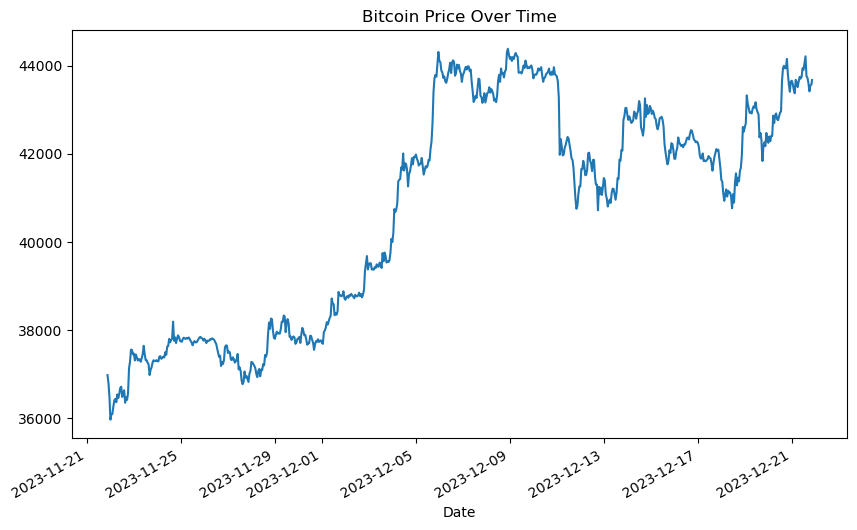

In [5]:
df['Price'].plot(figsize=(10, 6), title="Bitcoin Price Over Time")
plt.show()

In [6]:
df.reset_index(inplace=True)
df['Days'] = (df['Date'] - df['Date'].min()).dt.days

In [7]:
X = df[['Days']].values
y = df['Price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

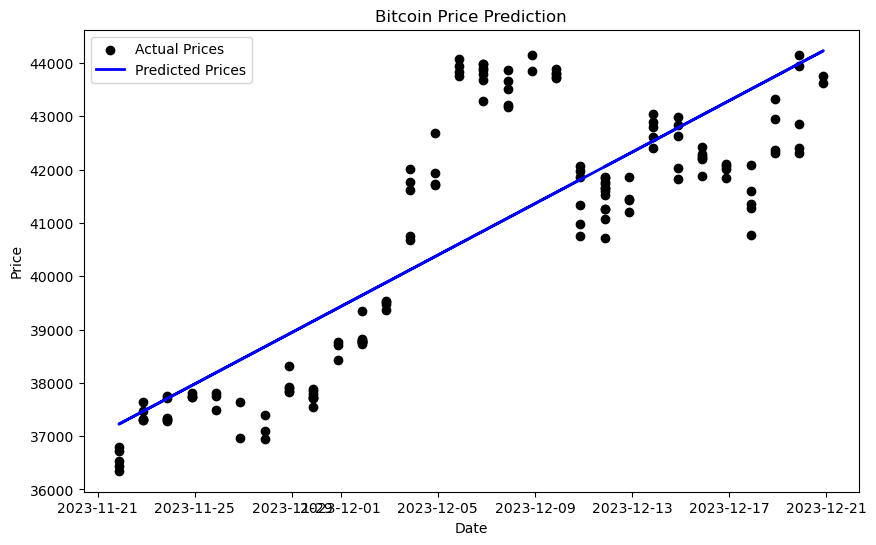

In [8]:
# Convert days back to dates for plotting
test_dates = pd.to_datetime(df['Date'].min() + pd.to_timedelta(X_test.flatten(), 'days'))

plt.figure(figsize=(10, 6))
plt.scatter(test_dates, y_test, color='black', label='Actual Prices')
plt.plot(test_dates, predictions, color='blue', linewidth=2, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin Price Prediction')
plt.legend()
plt.show()